<a href="https://colab.research.google.com/github/Loga19818eeanvesh/Natural_Language_Processing_Sequence_Models_Assignments/blob/main/tf_c3w2_l1_IMDB_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)


2.7.0


In [2]:
!pip install -q tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHBXK44/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHBXK44/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHBXK44/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
vocab_size = 10000
embedding_dim = 64
max_length = 128
trunc_type='post'
oov_tok = "<UNK>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
#
vocab_size = len(word_index)+1
#
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type, padding='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type, padding='post')

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 64)           5669376   
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 5,669,773
Trainable params: 5,669,773
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 57s 73ms/step - loss: 0.1433 - accuracy: 0.9516 - val_loss: 0.4454 - val_accuracy: 0.8200
Epoch 2/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0886 - accuracy: 0.9744 - val_loss: 0.4874 - val_accuracy: 0.8198
Epoch 3/10
782/782 [==============================] - 51s 66ms/step - loss: 0.0537 - accuracy: 0.9863 - val_loss: 0.5676 - val_accuracy: 0.8128
Epoch 4/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0312 - accuracy: 0.9939 - val_loss: 0.6628 - val_accuracy: 0.8038
Epoch 5/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.7314 - val_accuracy: 0.8022
Epoch 6/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0102 - accuracy: 0.9986 - val_loss: 0.8408 - val_accuracy: 0.7944
Epoch 7/10
782/782 [==============================] - 50s 64ms/step - loss: 0.0059 - accuracy: 0.9996 - val_loss: 0.8917 - val_accuracy:

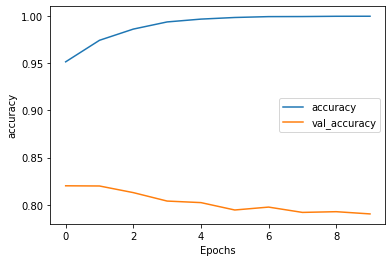

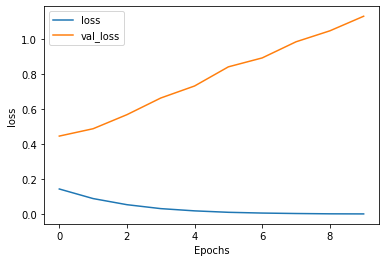

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights) # shape: (vocab_size, embedding_dim)

[[-0.01593629  0.00666305  0.04363026 ...  0.03538838  0.02467713
  -0.03567296]
 [-0.00566     0.01734466 -0.01759282 ...  0.02874012  0.01851282
  -0.0440039 ]
 [ 0.03316404 -0.03058624  0.01250867 ...  0.08030675  0.09504402
  -0.03261523]
 ...
 [-0.01526147 -0.09192377  0.08251817 ...  0.09602115  0.01454553
   0.05280793]
 [ 0.02739786  0.0430287   0.01624057 ...  0.04293581 -0.00056598
   0.04537794]
 [ 0.03814724  0.03440446  0.0442433  ... -0.04294109 -0.0265367
  -0.00113212]]


In [12]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]
